Creating OS environment and installing all the necessary packages


In [ ]:
# Importing necessary packages
import os
os.environ["TF_USE_LEGACY_KERAS"] = '1'

try:
  import ktrain
except:
  !pip install ktrain
  #os.kill(os.getpid(), 9)

import ktrain
import pandas as pd
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 23.8 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=873a9dc728ef744848c83ca2f13bc84f2d7dc5e5bff5e9eef4ec5a6c06046479
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=ke

In [ ]:
# Loading from ktrain
from ktrain import text
from ktrain.text import texts_from_df


In [ ]:
# Reading in the json file
news = pd.read_json('New_dataset.json', lines=True)

In [ ]:

# Getting a quick look at the 'news' dataset
news.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
# Getting more basic information about the 'news' dataset
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               800 non-null    object        
 1   headline           800 non-null    object        
 2   category           800 non-null    object        
 3   short_description  800 non-null    object        
 4   authors            800 non-null    object        
 5   date               800 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 37.6+ KB


In [ ]:
# Creating a new column ('combined_text') from 'headline' and 'short_description' columns
news['combined_text'] = news['headline'] + ' ' + news['short_description']

In [ ]:
news[news['category'].str.contains('HEALTHY LIVING') | news['category'].str.contains('WELLNESS')]

,link,headline,category,short_description,authors,date,combined_text
134,https://www.huffpost.com/entry/signs-of-teeth-...,6 Signs You’re Grinding Your Teeth At Night (A...,WELLNESS,"Beyond toothaches, there are other common red ...",Jillian Wilson,2022-08-30,6 Signs You’re Grinding Your Teeth At Night (A...
195,https://www.huffpost.com/entry/chest-pain-hear...,How To Tell If Your Chest Pain Is A Heart Problem,WELLNESS,Concerned your chest pain might be heart-relat...,Ashley Broadwater,2022-08-19,How To Tell If Your Chest Pain Is A Heart Prob...
278,https://www.huffpost.com/entry/fertility-treat...,Fertility Treatment Puts Many Families In Debt...,WELLNESS,Experts share their advice for easing the fina...,Caroline Bologna,2022-08-05,Fertility Treatment Puts Many Families In Debt...
299,https://www.huffpost.com/entry/micro-transiton...,4 'Micro-Transitions' In Your Day That May Be ...,WELLNESS,Certain points during your day can spark stres...,Alexandra Frost,2022-08-01,4 'Micro-Transitions' In Your Day That May Be ...
322,https://www.huffpost.com/entry/can-i-let-cat-o...,Should I Take My Cat Out In This Heat?,WELLNESS,Certain temperatures are too dangerous for pet...,Caroline Bologna,2022-07-27,Should I Take My Cat Out In This Heat? Certain...
410,https://www.huffpost.com/entry/anxiety-panic-a...,Why You Feel Hungover After An Anxiety Or Pani...,WELLNESS,This physical component of the mental health i...,Julia Ries,2022-07-08,Why You Feel Hungover After An Anxiety Or Pani...
438,https://www.huffpost.com/entry/compassion-fati...,What Is Compassion Fatigue? Here Are The Signs...,WELLNESS,The onslaught of bad news — from the abortion ...,Julia Ries,2022-07-01,What Is Compassion Fatigue? Here Are The Signs...
504,https://www.huffpost.com/entry/roe-v-wade-preg...,"Without Roe V. Wade, Pregnant Women May Face A...",WELLNESS,The criminalization of pregnancy is already an...,Caroline Bologna,2022-06-17,"Without Roe V. Wade, Pregnant Women May Face A..."
512,https://www.huffpost.com/entry/the-people-who-...,There Are Millions Of People Who Can't Just 'M...,WELLNESS,Learning to live with the virus is a privilege...,Brittany Wong,2022-06-15,There Are Millions Of People Who Can't Just 'M...
541,https://www.huffpost.com/entry/novavax-covid-v...,The Most Common Questions About The Novavax CO...,WELLNESS,"How is the shot different from Pfizer, Moderna...",Ashley Broadwater,2022-06-10,The Most Common Questions About The Novavax CO...


In [ ]:
# Creating a new column ('healthy')
news['healthy'] = np.where((news['category'] == 'WELLNESS') | (news['category'] == 'HEALTHY LIVING'), 1, 0)

In [ ]:
# Viewing basic statistical information of new 'healthy' column
news['healthy'].describe()


,healthy
count,800.000000
mean,0.017500
std,0.131207
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# Confirming number of 'healthy' news articles
1500 * 0.017500



26.250000000000004

In [ ]:
# Creating 24,639 samples of 'healthy' and 'not_healthy' entries
sample_size = 27
healthy = news[news['healthy']==1]
not_healthy = news[news['healthy']==0].sample(n=sample_size)


In [ ]:
# Concatenating the 'healthy' and 'not_healthy' entries into a sample dataset
news_sample = pd.concat([healthy, not_healthy])

In [ ]:
# Viewing the distribution of the sample dataset
news_sample.describe()


,date,healthy
count,41,41.000000
mean,2022-07-03 07:01:27.804878080,0.341463
min,2022-04-24 00:00:00,0.000000
25%,2022-06-08 00:00:00,0.000000
50%,2022-07-08 00:00:00,0.000000
75%,2022-08-03 00:00:00,1.000000
max,2022-08-30 00:00:00,1.000000
std,NaN,0.480091


In [ ]:
# Setting target names
target_names = ['NOT HEALTHY', 'HEALTHY']

In [ ]:
# Setting the parameters for the model
train, val, preprocess = texts_from_df(news_sample, 'combined_text',
                                       label_columns = ['healthy'],
                                       val_df = None,
                                       max_features = 20000,
                                       maxlen = 128,
                                       val_pct = 0.1,
                                       ngram_range = 1,
                                       preprocess_mode = 'distilbert')


['not_healthy', 'healthy']
     not_healthy  healthy
536          1.0      0.0
610          0.0      1.0
356          1.0      0.0
504          0.0      1.0
541          0.0      1.0
['not_healthy', 'healthy']
     not_healthy  healthy
350          1.0      0.0
382          1.0      0.0
143          1.0      0.0
271          1.0      0.0
410          0.0      1.0
preprocessing train...
language: en
train sequence lengths:
	mean : 32
	95percentile : 42
	99percentile : 45


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 28
	95percentile : 32
	99percentile : 33


In [ ]:
# Creating model and learner
model = ktrain.text.text_classifier('distilbert', train_data=train, preproc=preprocess)
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size = 8)

Is Multi-Label? False
maxlen is 128
done.


In [ ]:
# Using learner.lr_find to optimize the learning rate
learner.lr_find(max_epochs=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
4/4 [==============================] - 41s 7s/step - loss: 0.7230 - accuracy: 0.3750
Epoch 2/6
4/4 [==============================] - 23s 7s/step - loss: 0.6984 - accuracy: 0.3571
Epoch 3/6
4/4 [==============================] - 23s 6s/step - loss: 0.6679 - accuracy: 0.6071
Epoch 4/6
4/4 [==============================] - 24s 6s/step - loss: 0.6897 - accuracy: 0.7500
Epoch 5/6
4/4 [==============================] - 19s 4s/step - loss: 18.1376 - accuracy: 0.7083


/usr/local/lib/python3.10/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


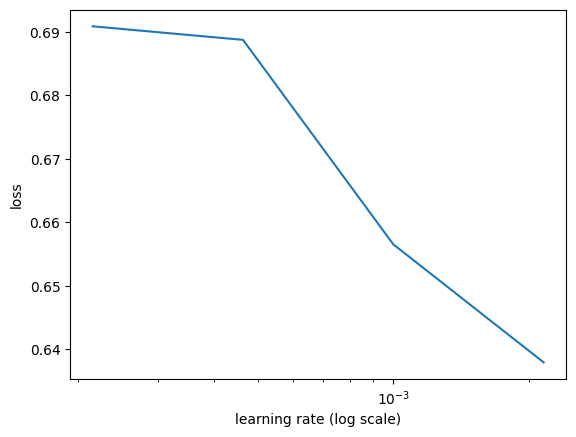

In [ ]:
# Visualizing learning rate loss performance across epochs
learner.lr_plot()

In [ ]:
# Applying optimal learning rate to model
history = learner.autofit(
    1e-4,
    checkpoint_folder = 'checkpoint',
    epochs = 7,
    early_stopping = True
)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/7
5/5 [==============================] - 39s 8s/step - loss: 0.5697 - accuracy: 0.6944 - val_loss: 0.4423 - val_accuracy: 0.6000
Epoch 2/7
5/5 [==============================] - 32s 6s/step - loss: 0.2698 - accuracy: 0.9167 - val_loss: 0.0718 - val_accuracy: 1.0000
Epoch 3/7
5/5 [==============================] - 39s 8s/step - loss: 0.1280 - accuracy: 0.9722 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 4/7
5/5 [==============================] - 37s 7s/step - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 5/7
5/5 [==============================] - 38s 8s/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 6/7
5/5 [==============================] - 32s 6s/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 5.
Weights from be

In [ ]:
#Model Validation
# Creating predictor and viewing metrics on validation data
predictor = ktrain.get_predictor(learner.model, preproc = preprocess)
validation = learner.validate(val_data = val, print_report = True)

1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [ ]:
# Creating novel headlines to make predictions on
test_docs = []
probs = []
result_probs = []

In [ ]:
test_docs = news['short_description'].sample(n=10)

In [ ]:
# Making predictions on 'test_docs'
for i, text in enumerate(test_docs):
  probs = predictor.predict(text, return_proba=True)
  print("---------------------------")
  print('The probability this is healthy is %s' % probs[1])
  print(text)
  result_probs.append(probs[1])

---------------------------
The probability this is healthy is 0.015377898
Democratic Sen. Kyrsten Sinema of Arizona has received nearly $1 million in campaign contributions over the past year from private equity professionals, hedge fund managers and venture capitalists whose interests she has staunchly defended in Congress.
---------------------------
The probability this is healthy is 0.010092191
Allen Weisselberg is charged with taking more than $1.7 million in off-the-books compensation from the Trump Organization over several years.
---------------------------
The probability this is healthy is 0.377391
This isn’t the country's first attempt at an atomic renaissance. Will the Dutch actually make it work this time?
---------------------------
The probability this is healthy is 0.9361736
Since the fall of Roe, some pharmacies have refused to fill certain prescriptions that are the same as or similar to the drugs used in medication abortion.
---------------------------
The probabili

In [ ]:
# based on the value of probability we are dividing the classification
import pandas as pd

bert_output = []

for prob in result_probs:
    if prob > 0.006:
        bert_output.append({'related': True})
    else:
        bert_output.append({'related': False})



# Write or append the data to the Excel file
df = pd.DataFrame(bert_output)
df.to_excel('bert_output.xlsx', index=False)

Introducing OpenAI models - GPT 4o, GPT 4o-mini

In [ ]:
#Installing necessary packages
%pip install pandas
%pip install openai
%pip install matplotlib
%pip install openpyxl

In [ ]:
#loading OpenAI
import pandas as pd
from openai import OpenAI

In [ ]:
#Reading the dataset json file
file_path = "New_dataset.json"
df = pd.read_json(file_path, lines=True)

In [ ]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
#Provinding prompt to the model
system_prompt = """
You're an expert in classifying the given news article weather it is related to health or wellness category or not.

Input article:
**

Headline:

{headline}

Short Description:

{short_description}

**
"""

user_prompt = """
Classify the given news article is related to health or wellness category or not.

** JSON Response Structure **
Output format: strictly json output

```{"related": True, "category": "health"}```

	- `related` : return `True` or `False` weather the given news article is related to health or wellness category or not.
  - `category` :  returns one of category health or wellness, default to `na` if it is not matching

** Do not add any prefixes to the JSON output **
"""

In [ ]:
i = 2
print(df["headline"][i])
print(df["short_description"][i])

23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)
"Until you have a dog you don't understand what could be eaten."


In [ ]:
df = df.head(10)


In [ ]:
prompts = []
for record in df.to_dict(orient="records"):
  prompts.append(system_prompt.format(headline=record["headline"], short_description=record["short_description"]))

In [ ]:
print(prompts[1])
# prompts are nothing but instructions to the model


You're an expert in classifying the given news article weather it is related to health or wellness category or not.

Input article:
**

Headline:

American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video

Short Description:

He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.

**



In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""

Classifying using GPT 4o mini

In [ ]:
import json
client = OpenAI()
output = []
for prompt in prompts:
  completion = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=[
          {
              "role": "system",
              "content": prompt
          },
          {
              "role": "user",
              "content": user_prompt
          }
      ]
  )
  output.append(completion.choices[0].message.content)


In [ ]:
import re
gpt_4o_mini_output = []
for i in range(len(output)):
  record = output[i].replace("```json", "").replace("```", "").replace("\n", "").replace("'", '"')
  related_match = re.search(r'"related": (true|false)', record, re.IGNORECASE)
  category_match = re.search(r'"category": "([^"]+)"', record)

  related = related_match.group(1).lower() == 'true' if related_match else None
  category = category_match.group(1) if category_match else None
  gpt_4o_mini_output.append(dict(related=related, category=category))

In [ ]:
gpt_4o_mini_output

[{'related': True, 'category': 'health'},
 {'related': False, 'category': 'na'},
 {'related': False, 'category': 'na'},
 {'related': False, 'category': 'na'},
 {'related': False, 'category': 'na'},
 {'related': False, 'category': 'na'},
 {'related': False, 'category': 'na'},
 {'related': True, 'category': 'health'},
 {'related': False, 'category': 'na'},
 {'related': False, 'category': 'na'}]

In [ ]:


import pandas as pd
# Create a new dataframe with the original dataframe and the gpt-4o-mini output
df_with_output = df.head(len(gpt_4o_mini_output)).copy()  # Ensure the same number of rows
df_with_output['gpt_4o_mini_related'] = [item['related'] for item in gpt_4o_mini_output]
df_with_output['gpt_4o_mini_category'] = [item['category'] for item in gpt_4o_mini_output]

# Export the dataframe to an Excel file
df_with_output.to_excel('gpt_4o_mini_output.xlsx', index=False)

Classifying the Data set using GPT 4o

In [ ]:
import json
client = OpenAI()
output_gpt_4o = []
for prompt in prompts:
  completion = client.chat.completions.create(
      model="gpt-4o",
      messages=[
          {
              "role": "system",
              "content": prompt
          },
          {
              "role": "user",
              "content": user_prompt
          }
      ]
  )
  output_gpt_4o.append(completion.choices[0].message.content)

In [ ]:
import re
gpt_4o_output = []
for i in range(len(output)):
  record = output_gpt_4o[i].replace("```json", "").replace("```", "").replace("\n", "").replace("'", '"')
  related_match = re.search(r'"related": (true|false)', record, re.IGNORECASE)
  category_match = re.search(r'"category": "([^"]+)"', record)

  related = related_match.group(1).lower() == 'true' if related_match else None
  category = category_match.group(1) if category_match else None
  gpt_4o_output.append(dict(related=related, category=category))

In [ ]:
print(gpt_4o_output)

[{'related': True, 'category': 'health'}, {'related': False, 'category': 'na'}, {'related': False, 'category': 'na'}, {'related': False, 'category': 'na'}, {'related': False, 'category': 'na'}, {'related': False, 'category': 'na'}, {'related': False, 'category': 'na'}, {'related': True, 'category': 'health'}, {'related': False, 'category': 'na'}, {'related': False, 'category': 'na'}]


In [ ]:
df_bert = pd.read_excel("/content/bert_output.xlsx")

In [ ]:
df_bert.head()

,related
0,True
1,True
2,True
3,True
4,True


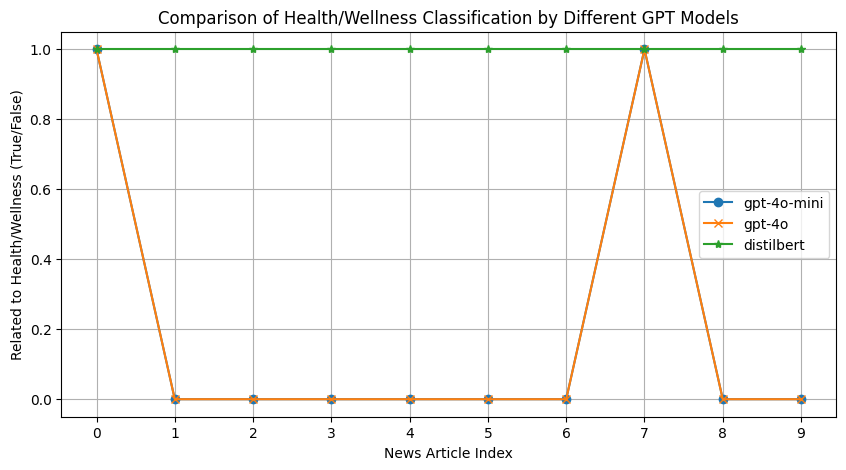

In [ ]:
import matplotlib.pyplot as plt

# Assuming gpt_4o_mini_output and gpt_4o_output are lists of dictionaries with 'related' and 'category' keys
# Extract 'related' values for each model
related_gpt_4o_mini = [item['related'] for item in gpt_4o_mini_output]
related_gpt_4o = [item['related'] for item in gpt_4o_output]
related_distilbert =  df_bert['related'].to_list()

# Create a list of indices for the x-axis
x_indices = list(range(len(related_gpt_4o)))


# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x_indices, related_gpt_4o_mini, label='gpt-4o-mini', marker='o')
plt.plot(x_indices, related_gpt_4o, label='gpt-4o', marker='x')
plt.plot(x_indices, related_distilbert, label='distilbert', marker='*')

plt.xlabel('News Article Index')
plt.ylabel('Related to Health/Wellness (True/False)')
plt.title('Comparison of Health/Wellness Classification by Different GPT Models')
plt.xticks(x_indices)
plt.legend()
plt.grid(True)
plt.show()

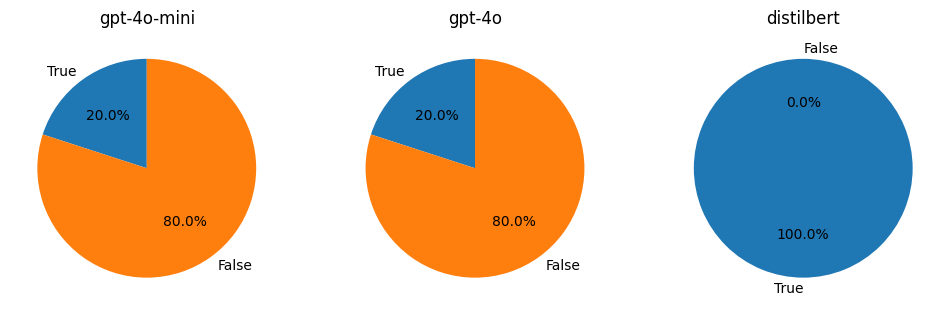

In [ ]:

# Assuming gpt_4o_mini_output and gpt_4o_output are lists of dictionaries with 'related' and 'category' keys
# Count the number of True and False values for each model
true_count_gpt_4o_mini = sum(1 for item in gpt_4o_mini_output if item['related'] == True)
false_count_gpt_4o_mini = sum(1 for item in gpt_4o_mini_output if item['related'] == False)
true_count_gpt_4o = sum(1 for item in gpt_4o_output if item['related'] == True)
false_count_gpt_4o = sum(1 for item in gpt_4o_output if item['related'] == False)
true_count_distilbert = sum(1 for item in df_bert['related'] if item == True)
false_count_distilbert = sum(1 for item in df_bert['related'] if item == False)


# Create data for the pie charts
labels = ['True', 'False']
sizes_gpt_4o_mini = [true_count_gpt_4o_mini, false_count_gpt_4o_mini]
sizes_gpt_4o = [true_count_gpt_4o, false_count_gpt_4o]
sizes_distilbert = [true_count_distilbert, false_count_distilbert]

# Plot the pie charts
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].pie(sizes_gpt_4o_mini, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('gpt-4o-mini')

axes[1].pie(sizes_gpt_4o, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('gpt-4o')

axes[2].pie(sizes_distilbert, labels=labels, autopct='%1.1f%%', startangle=90)
axes[2].set_title('distilbert')


plt.show()